# Aufgabe 3: MNIST Modell

## LOADING PACKAGES

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library


%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## Datenimport und Aufbereitung

In [5]:
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# reshape data: Inputlayer muss eine Liste sein
x_train = x_train.reshape((60000,28*28)) # 60'000 Bilder mit 28x28 Pixel
x_test = x_test.reshape((10000,28*28))

# skalieren der Daten
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Modell 1:


In [6]:
# Modell-Struktur
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Modell kompilieren / zusammenstellen
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren inkl. Validation Split
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,             # Default: 32
                    validation_split =0.1)



Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2776 - accuracy: 0.9165 - val_loss: 0.1222 - val_accuracy: 0.9625
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0999 - accuracy: 0.9705 - val_loss: 0.0853 - val_accuracy: 0.9748
Epoch 3/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0838 - val_accuracy: 0.9753
Epoch 4/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0730 - val_accuracy: 0.9813
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0702 - val_accuracy: 0.9803
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0762 - val_accuracy: 0.9808
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0818 - val_accur

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 8)                 4104      
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 406,114
Trainable params: 406,114
Non-trainable params: 0
_________________________________________________________________



Accuracy during Training :
------------------------------------


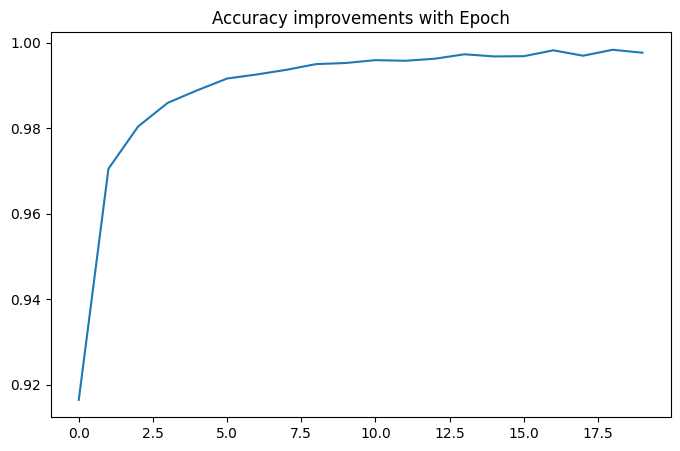


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9749


[0.15035386383533478, 0.9749000072479248]

In [8]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

### Modell 2:


In [9]:
# Modell-Struktur
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(392, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(196, activation='relu'))
model.add(tf.keras.layers.Dense(98, activation='relu'))
model.add(tf.keras.layers.Dense(48, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Modell kompilieren / zusammenstellen
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# Modell trainieren inkl. Validation Split
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split =0.1)

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 0.2802 - accuracy: 0.9153 - val_loss: 0.0957 - val_accuracy: 0.9723
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0998 - accuracy: 0.9696 - val_loss: 0.0894 - val_accuracy: 0.9723
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0737 - val_accuracy: 0.9787
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0773 - val_accuracy: 0.9782
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.0756 - val_accuracy: 0.9793
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 392)               307720    
                                                                 
 dense_7 (Dense)             (None, 196)               77028     
                                                                 
 dense_8 (Dense)             (None, 98)                19306     
                                                                 
 dense_9 (Dense)             (None, 48)                4752      
                                                                 
 dense_10 (Dense)            (None, 10)                490       
                                                                 
Total params: 409,296
Trainable params: 409,296
Non-trainable params: 0
_________________________________________________________________



Accuracy during Training :
------------------------------------


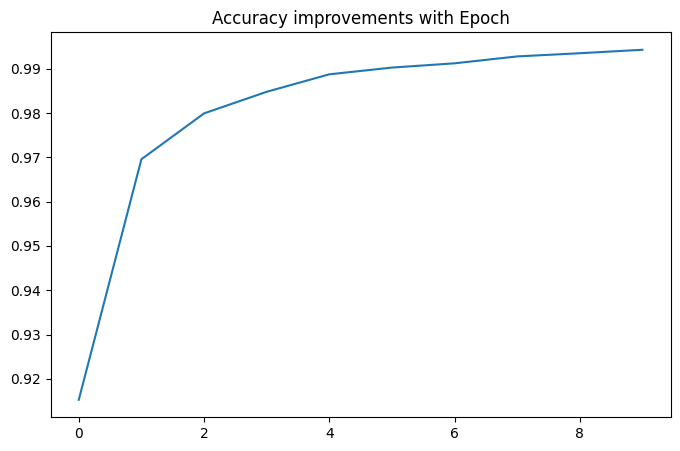


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9799


[0.08949261903762817, 0.9799000024795532]

In [12]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

### Modell 3:

In [13]:
# Modell-Struktur
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(392, activation='relu', input_shape=(28*28,), kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(tf.keras.layers.Dense(98, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# Modell kompilieren / zusammenstellen
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Modell trainieren inkl. Validation Split
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split =0.1)

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 2491.3799 - accuracy: 0.4184 - val_loss: 1875.3462 - val_accuracy: 0.5972
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 1250.9619 - accuracy: 0.6820 - val_loss: 619.1076 - val_accuracy: 0.7880
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 176.0208 - accuracy: 0.7389 - val_loss: 7.1918 - val_accuracy: 0.6467
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 2.6536 - accuracy: 0.7015 - val_loss: 1.4706 - val_accuracy: 0.8525
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 1.4842 - accuracy: 0.8303 - val_loss: 1.3761 - val_accuracy: 0.8767
Epoch 6/20
422/422 [==============================] - 2s 6ms/step - loss: 1.3480 - accuracy: 0.8502 - val_loss: 1.2061 - val_accuracy: 0.8860
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 1.2814 - accuracy: 0.8601 - val_loss: 1.1552 - val_accuracy: 

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 392)               307720    
                                                                 
 dense_12 (Dense)            (None, 98)                38514     
                                                                 
 dense_13 (Dense)            (None, 10)                990       
                                                                 
Total params: 347,224
Trainable params: 347,224
Non-trainable params: 0
_________________________________________________________________



Accuracy during Training :
------------------------------------


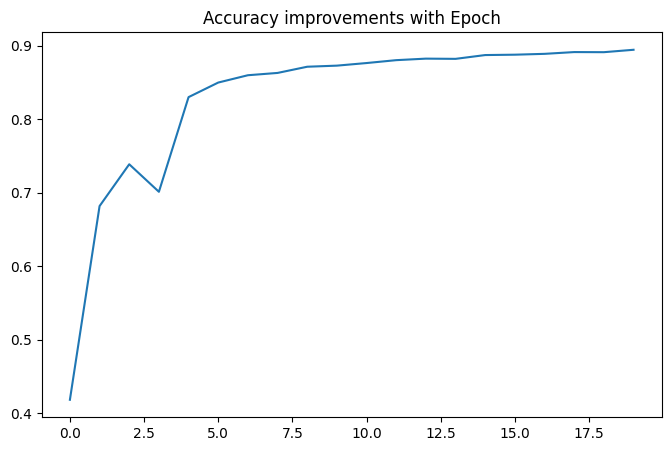


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 1.1519 - accuracy: 0.8909


[1.1519440412521362, 0.8909000158309937]

In [16]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)